In [3]:
%matplotlib inline

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [44]:
hour = 21

In [45]:
p_loc = '/Users/TRD/Research_Personal/Quant_Mo/data/pickled/'
file = p_loc+str(hour)+'all_data.pkl'

In [46]:
dp = pd.read_pickle(file)

/Users/TRD/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/TRD/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


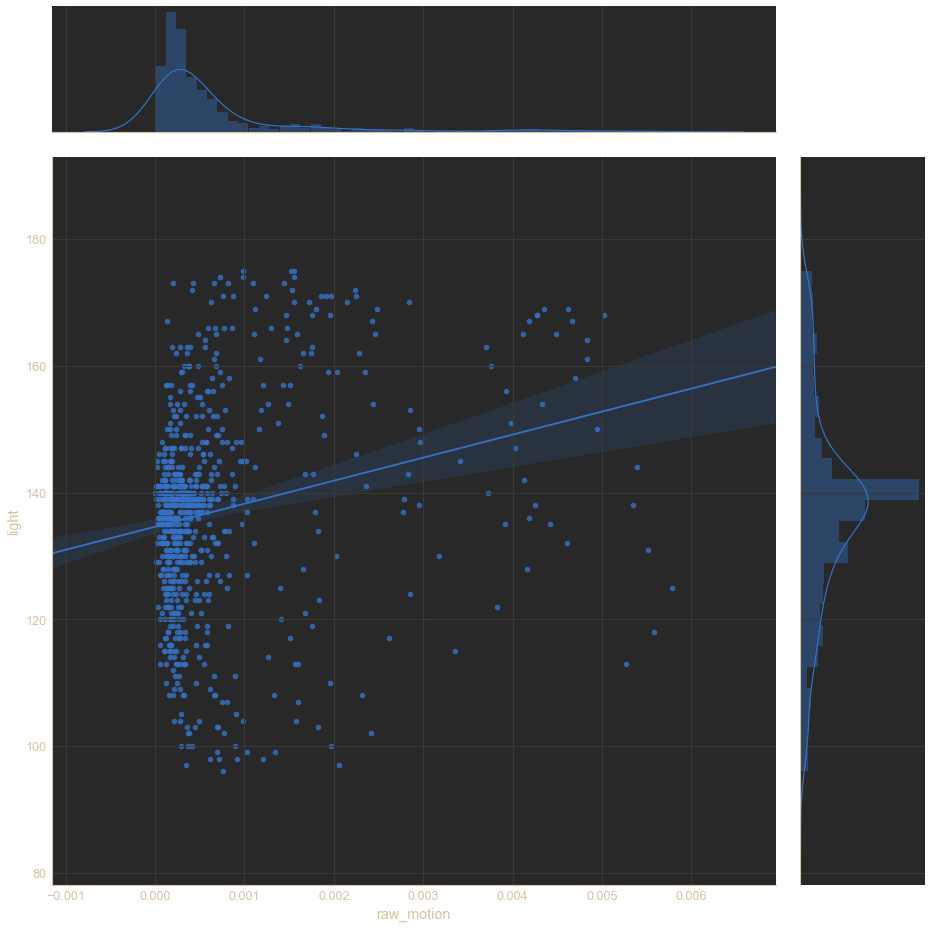

In [47]:
sns.jointplot('raw_motion','light', data=dp, kind='reg', size=13)

LinAlgError: singular matrix

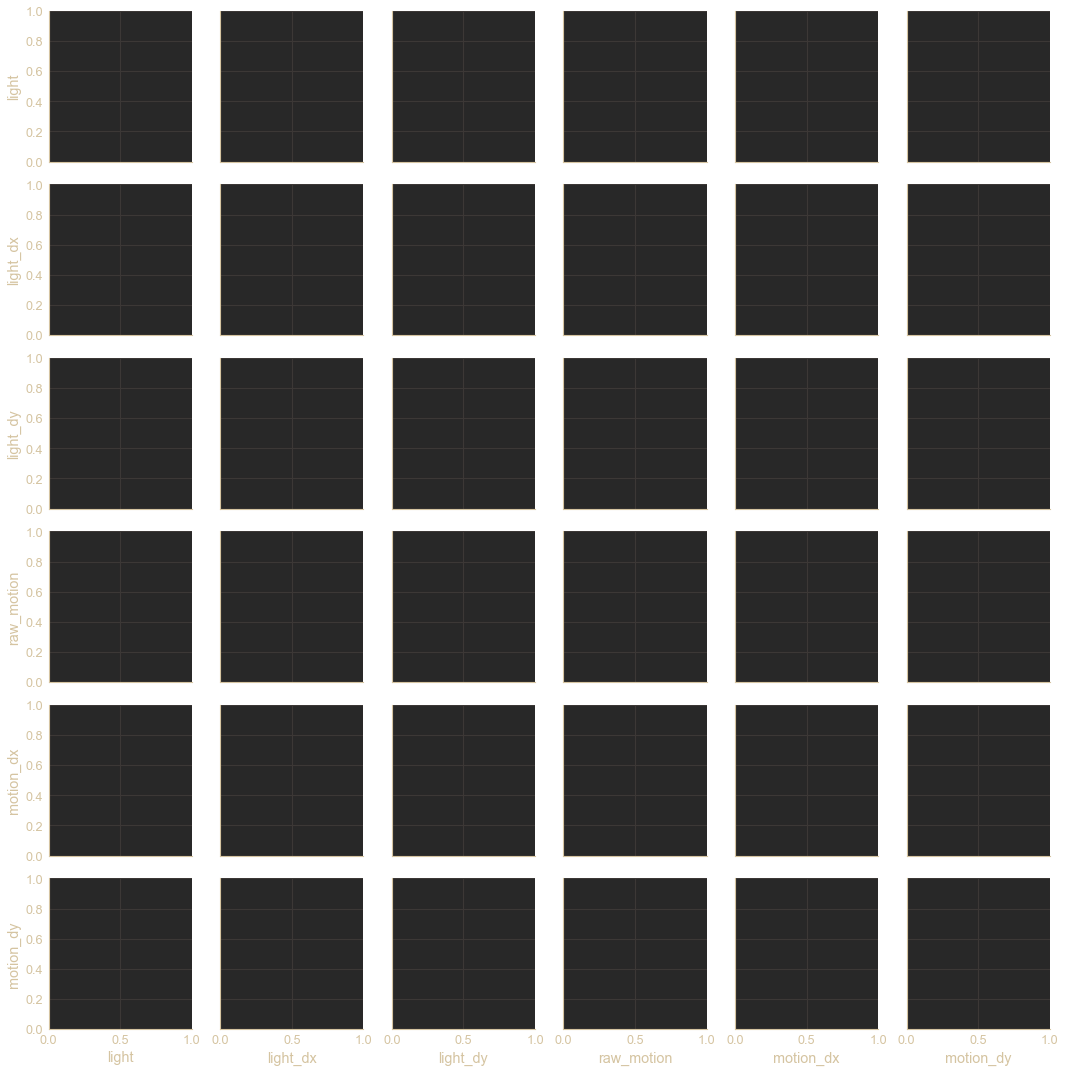

In [49]:
sns.pairplot(data_packet)